# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [57]:
import pandas as pd
import numpy as np
from numpy import sqrt 
import json
import matplotlib.pyplot as plt


## Load and display the data

In [58]:
#your code here
df = pd.read_csv('Tweets.csv')
df.head(10)

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,lang,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,en,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,en,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,en,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,en,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,en,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503
5,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @baekaeri06: an exo-l doing a magic trick! ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,1602,...,en,tan god jongin,artychubs,577,251,6,Fri May 10 07:37:30 +0000 2013,6136,False,11902
6,Tue Jul 31 13:34:35 +0000 2018,1.024290e+18,1.024290e+18,i really going to miss my girl i swear to god ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,0,...,en,ð’‰,6khhouri9,11,5,0,Wed May 16 06:51:22 +0000 2018,3,False,220
7,Tue Jul 31 13:34:13 +0000 2018,1.024290e+18,1.024290e+18,@1Fubar @amandadonnell14 @sw18780774 Only a ta...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,1,...,en,Steven Andrew Dismas Kennedy,StevenAndrewDi1,820,1174,1,Mon Mar 12 03:00:11 +0000 2018,3943,False,5024
8,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @timhiggins2287: Each year WSTS shows how W...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",True,1,...,en,WiSys,wisystto,1111,706,0,Fri May 01 13:53:58 +0000 2009,143,False,1584
9,Tue Jul 31 13:34:25 +0000 2018,1.024290e+18,1.024290e+18,Thanks to @benjaminstaal00 for these fantastic...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,0,...,en,Ocean Youth Trust Scotland,OYTScotland,1267,1225,18,Wed Nov 10 12:09:27 +0000 2010,1002,False,1189

In [36]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [ ]:
# your code here


## Part-1
*Vectorize tweets using only meta data*

In [59]:
from sklearn.preprocessing import StandardScaler
def get_features(df):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of chosen features)
  Input parameters to this funcion are to be chosen as per requirement (Example: Loaded dataframe of the dataset) 
  """
  op=df.drop(['created_at','id','id_str','text','truncated','entities','metadata','source','user_created_at',	'is_quote_status','lang','user_name','user_screen_name'], axis='columns')
  # op.drop(11098,inplace=True)
  op.head()
  return op
features= get_features(df)
labels=pd.read_csv('ground_truth.csv', header = None)
labelt=np.array(labels.iloc[:,:])
labels=labelt.reshape(-1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8879, 8)
(2220, 8)
(8879,)
(2220,)


Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

At k= 1 Accuracy = 0.9463963963963964
At k= 2 Accuracy = 0.9441441441441442
At k= 3 Accuracy = 0.9432432432432433
At k= 4 Accuracy = 0.9445945945945946
At k= 5 Accuracy = 0.9427927927927928
At k= 6 Accuracy = 0.9454954954954955
At k= 7 Accuracy = 0.9477477477477477
At k= 8 Accuracy = 0.9490990990990991
At k= 9 Accuracy = 0.9468468468468468
At k= 10 Accuracy = 0.9459459459459459
At k= 11 Accuracy = 0.9459459459459459
At k= 12 Accuracy = 0.9472972972972973
At k= 13 Accuracy = 0.945045045045045
At k= 14 Accuracy = 0.9454954954954955
At k= 15 Accuracy = 0.9414414414414415
At k= 16 Accuracy = 0.945045045045045
At k= 17 Accuracy = 0.9436936936936937
At k= 18 Accuracy = 0.9454954954954955
At k= 19 Accuracy = 0.9436936936936937
At k= 20 Accuracy = 0.9436936936936937
At k= 21 Accuracy = 0.9432432432432433
At k= 22 Accuracy = 0.9432432432432433
At k= 23 Accuracy = 0.9418918918918919
At k= 24 Accuracy = 0.9436936936936937
At k= 25 Accuracy = 0.9418918918918919
At k= 26 Accuracy = 0.94099099099099

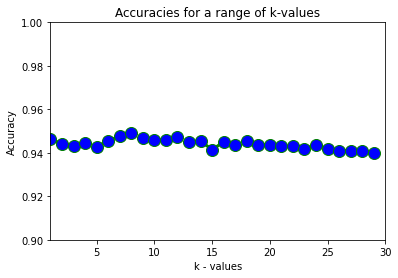

In [75]:
# your code here
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.neighbors import NearestNeighbors



def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
      distance += (row1[i] - row2[i])**2
    return sqrt(distance)
class KNN_Classifier:
  y_new_test=[]
  def __init__(self, k):
    self.k=k
  def fit(self,X_train, y_train):
    print("fit called")
  def score(self,X_train, y_train, X_test,y_test):
    nbrs = NearestNeighbors(n_neighbors=self.k).fit(X_train)
    indices = nbrs.kneighbors(X_test,return_distance=False)
    score_sum=0
    for i in range(len(indices)):
      count=[0,0]
      for j in range(self.k):
        if(y_train[indices[i][j]]==0):
          count[0]+=1
        else:
          count[1]+=1
      if(count[0]>= count[1] and y_test[i] == 0):
        score_sum+=1
      if(count[0] < count[1] and y_test[i] == 1):
        score_sum+=1

    scr=score_sum/len(y_test)
    print("At k=",self.k,"Accuracy =",scr)
    return scr
scores = list()
k_values = list()
#knn = KNeighborsClassifier(n_neighbors=5)
for k in range(1,30):
  knn=KNN_Classifier(k)
#knn.fit(X_train, y_train)
  k_values.append(k)
  scores.append(knn.score(X_train, y_train,X_test,y_test))
plt.plot(k_values, scores, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
plt.ylim(0.9,1)
plt.xlim(1,30)
plt.xlabel('k - values')
plt.ylabel('Accuracy')
  
plt.title('Accuracies for a range of k-values')
plt.show()


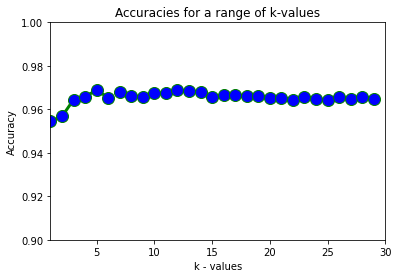

In [61]:
plt.plot(k_values, scores, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
plt.ylim(0.9,1)
plt.xlim(1,30)

plt.xlabel('k - values')
plt.ylabel('Accuracy')
  
plt.title('Accuracies for a range of k-values')
plt.show()

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [62]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
def tweet_vectoriser(df):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  op=df.drop(['created_at','id','retweet_count', 'favorite_count', 'user_followers_count', 'user_friends_count', 'user_listed_count', 'user_favourites_count', 'user_verified','user_statuses_count','id_str','truncated','entities','metadata','source','user_created_at',	'is_quote_status','lang','user_name','user_screen_name'], axis='columns')
  count=0
  for tweet in op['text']:
    tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
    tweet = re.sub("http[^\s]+","", tweet)
    op.at[count,'text']= re.sub("#[A-Za-z0-9_]+","", tweet)
    count=count+1
  label = op['text']
  tfidfconverter = TfidfVectorizer(max_features=20, min_df=5, max_df=0.7, stop_words='english').fit(label)
  X = tfidfconverter.transform(label)
  return X
features=tweet_vectoriser(df)
import scipy.sparse
features=pd.DataFrame.sparse.from_spmatrix(features)
features=features.sparse.to_dense()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8879, 20)
(2220, 20)
(8879,)
(2220,)


In [63]:
scaled_features

array([[-0.20360861, -0.14935838, -0.17203908, ..., -0.17703873,
        -0.10746129, -0.2974743 ],
       [-0.20360861, -0.14935838, -0.17203908, ...,  4.73345455,
        -0.10746129, -0.2974743 ],
       [ 2.00102454, -0.14935838, -0.17203908, ..., -0.17703873,
        -0.10746129,  3.55267105],
       ...,
       [-0.20360861, -0.14935838, -0.17203908, ..., -0.17703873,
        -0.10746129, -0.2974743 ],
       [-0.20360861, -0.14935838, -0.17203908, ..., -0.17703873,
        -0.10746129, -0.2974743 ],
       [-0.20360861, -0.14935838, -0.17203908, ..., -0.17703873,
        -0.10746129, -0.2974743 ]])

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

At k= 1 Accuracy = 0.9463963963963964
At k= 2 Accuracy = 0.9441441441441442
At k= 3 Accuracy = 0.9432432432432433
At k= 4 Accuracy = 0.9445945945945946
At k= 5 Accuracy = 0.9427927927927928
At k= 6 Accuracy = 0.9454954954954955
At k= 7 Accuracy = 0.9477477477477477
At k= 8 Accuracy = 0.9490990990990991
At k= 9 Accuracy = 0.9468468468468468
At k= 10 Accuracy = 0.9459459459459459
At k= 11 Accuracy = 0.9459459459459459
At k= 12 Accuracy = 0.9472972972972973
At k= 13 Accuracy = 0.945045045045045
At k= 14 Accuracy = 0.9454954954954955
At k= 15 Accuracy = 0.9414414414414415
At k= 16 Accuracy = 0.945045045045045
At k= 17 Accuracy = 0.9436936936936937
At k= 18 Accuracy = 0.9454954954954955
At k= 19 Accuracy = 0.9436936936936937
At k= 20 Accuracy = 0.9436936936936937
At k= 21 Accuracy = 0.9432432432432433
At k= 22 Accuracy = 0.9432432432432433
At k= 23 Accuracy = 0.9418918918918919
At k= 24 Accuracy = 0.9436936936936937
At k= 25 Accuracy = 0.9418918918918919
At k= 26 Accuracy = 0.94099099099099

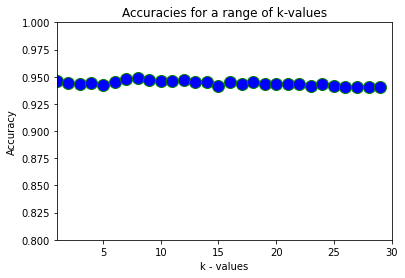

In [76]:
# your code here

scores = list()
k_values = list()
#knn = KNeighborsClassifier(n_neighbors=5)
for k in range(1,30):
  knn=KNN_Classifier(k)
#knn.fit(X_train, y_train)
  k_values.append(k)
  scores.append(knn.score(X_train, y_train,X_test,y_test))
plt.plot(k_values, scores, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
plt.ylim(0.8,1)
plt.xlim(1,30)

plt.xlabel('k - values')
plt.ylabel('Accuracy')
  
plt.title('Accuracies for a range of k-values')
plt.show()

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [67]:
# your code here

import scipy.sparse
features=tweet_vectoriser(df)
features=pd.DataFrame.sparse.from_spmatrix(features)
features_from_text=features.sparse.to_dense()
#features_from_text
features_from_meta=get_features(df)
#features_from_meta
features = pd.concat([features_from_meta, features_from_text], axis=1)
#features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2)
scores = list()
knn=KNN_Classifier(5)
scores.append(knn.score(X_train, y_train,X_test,y_test))
scores


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


At k= 5 Accuracy = 0.9427927927927928


[0.9427927927927928]

Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

At k= 1 Accuracy = 0.9463963963963964
At k= 2 Accuracy = 0.9441441441441442
At k= 3 Accuracy = 0.9432432432432433
At k= 4 Accuracy = 0.9445945945945946
At k= 5 Accuracy = 0.9427927927927928
At k= 6 Accuracy = 0.9454954954954955
At k= 7 Accuracy = 0.9477477477477477
At k= 8 Accuracy = 0.9490990990990991
At k= 9 Accuracy = 0.9468468468468468
At k= 10 Accuracy = 0.9459459459459459
At k= 11 Accuracy = 0.9459459459459459
At k= 12 Accuracy = 0.9472972972972973
At k= 13 Accuracy = 0.945045045045045
At k= 14 Accuracy = 0.9454954954954955
At k= 15 Accuracy = 0.9414414414414415
At k= 16 Accuracy = 0.945045045045045
At k= 17 Accuracy = 0.9436936936936937
At k= 18 Accuracy = 0.9454954954954955
At k= 19 Accuracy = 0.9436936936936937
At k= 20 Accuracy = 0.9436936936936937
At k= 21 Accuracy = 0.9432432432432433
At k= 22 Accuracy = 0.9432432432432433
At k= 23 Accuracy = 0.9418918918918919
At k= 24 Accuracy = 0.9436936936936937
At k= 25 Accuracy = 0.9418918918918919
At k= 26 Accuracy = 0.94099099099099

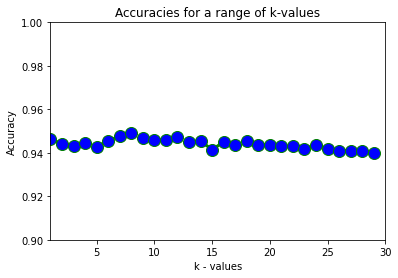

In [69]:
# your code here
scores = list()
k_values = list()
#knn = KNeighborsClassifier(n_neighbors=5)
for k in range(1,30):
  knn=KNN_Classifier(k)
#knn.fit(X_train, y_train)
  k_values.append(k)
  scores.append(knn.score(X_train, y_train,X_test,y_test))
plt.plot(k_values, scores, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
  
plt.ylim(0.9,1)
plt.xlim(1,30)

plt.xlabel('k - values')
plt.ylabel('Accuracy')
  
plt.title('Accuracies for a range of k-values')
plt.show()

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

##differences between the accuracies obtained in each part
Vectorize tweets using only meta data - likes , user followers count , and other created data gives 96.89 % accuracy and Vectorize tweets using only it's text gives 91% accuracy. Combining the vectors from above two techinques to create one bigger vector then gives 94.5% accuracy.

Vectorize tweets using only it's text has less accuracy becouse text may  be in different-different languages and working with numerical values is efficient than working with text.